<a href="https://colab.research.google.com/github/microprediction/endersnotebooks/blob/main/enders_data_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install --upgrade git+https://github.com/microprediction/endersgame.git


  Cloning https://github.com/microprediction/endersgame.git to /tmp/pip-req-build-skln5x61
  Running command git clone --filter=blob:none --quiet https://github.com/microprediction/endersgame.git /tmp/pip-req-build-skln5x61
  Resolved https://github.com/microprediction/endersgame.git to commit 6a91d6cf9a780a886386318b71ce1583de8e2343
  Preparing metadata (setup.py) ... done
  Created wheel for endersgame: filename=endersgame-0.3.1-py3-none-any.whl size=28574 sha256=a286224aceaf948c19a3528ba7f22f23e59f3a7dbbb75935f58692c7944808de
  Stored in directory: /tmp/pip-ephem-wheel-cache-jqbgxch8/wheels/39/24/f0/19aeef5765f9b9f629bab092893ebd3c04bde902d978c742bb
Successfully built endersgame
  Attempting uninstall: endersgame
    Found existing installation: endersgame 0.3.0
    Uninstalling endersgame-0.3.0:
      Successfully uninstalled endersgame-0.3.0


## A single stream of data
Here we specify the stream_id

In [3]:
from endersgame.datasources.streamgenerator import stream_generator
gen = stream_generator(stream_id=0, category='train')  # 'train', 'test','validate'

In [10]:
print(next(gen))     # Run cell as many times as you like to get fresh data points

10300.423076925972


Consume 10,000 values like this:

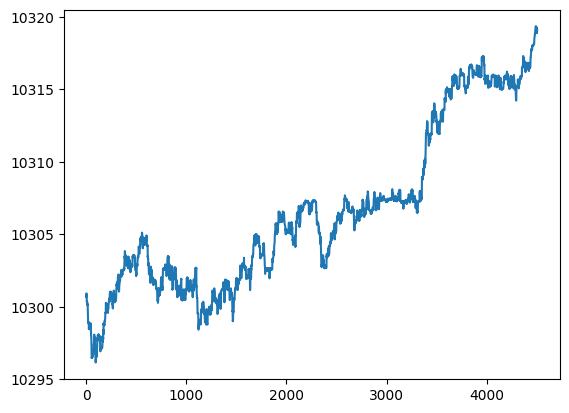

In [11]:
xs = list()
count = 0
for x in gen:
    count+=1
    xs.append(x)
    if count> 10000:
      break
import matplotlib.pyplot as plt
plt.plot(xs)
plt.show()



## Stream generator generator

In [15]:
from endersgame.datasources.streamgeneratorgenerator import stream_generator_generator
gen_gen = stream_generator_generator(category='train')

count = 0
for gen in gen_gen:
    # Do something with the stream generator
    value = next(gen)
    print(f'Found {count} streams thus far. The first value is {value}')
    assert value is not None
    count += 1
    if count>=3:
        break

Found 0 streams thus far. The first value is 10301.11538461828
Found 1 streams thus far. The first value is 10313.653846156743
Found 2 streams thus far. The first value is 10283.53846154135
